# Transforming Text into Data Structures

- Text data offers a very unique proposition by not providing any direct representation available for it in terms of numbers
- computer understands only numbers
- Representing text using numbers is a challenge

- The important concepts that validate any language are
    - syntax
    - semantics

- <b>syntax</b>:  defines the grammatical structures or the set of rules defining a language. It can be thought of as a set of guiding principles that define how
words can be put in each other's vicinity to form sentences or phrases

- <b>Semmantics</b>:  is the part that takes care of the meanings and defines how to put words together so that they actually make sense
when organized based on the available syntactical rules

- In this we mostly consider primarily on the syntactical aspects, where we use information such as how many times a word occured

- The most popular data structures used with text data are vectors and matrices

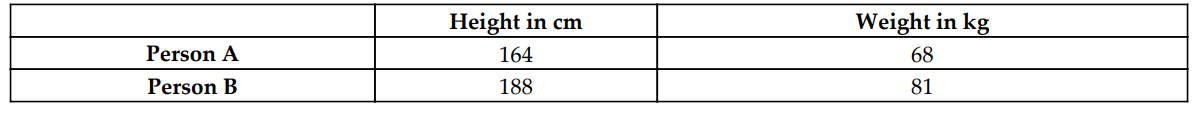

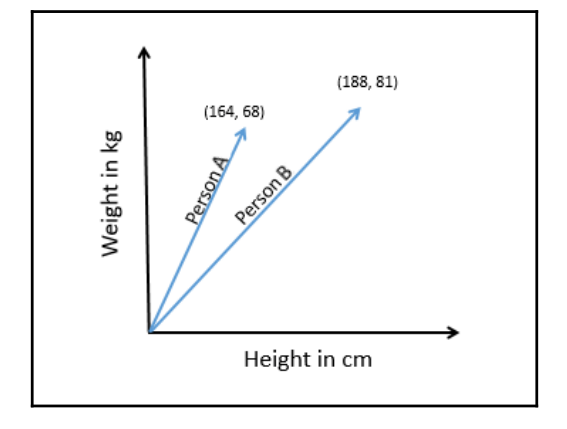

- the two persons can be represented using two vectors in space

- Vectorization enables us to analyze subjects by using vector properties and operations such
as magnitude, similarity, dissimilarity

- A tokenized text document could be abstracted as a vector in an n-dimensional space where
each dimension (axis) in the space corresponds to a unique token of that document

-  In the context of text analysis, matrices are used frequently to represent and
analyze text data. Typically, each document vector is represented as a row of a matrix.

## Count Vectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

X = ("Computer can analyze text", "They do it using vectors and matrices", "Computers can process massive amounts of text data")

vectorizer = CountVectorizer(stop_words = 'english')
X_vec = vectorizer.fit_transform(X)
print(vectorizer.vocabulary_)
print(X_vec.todense())

{'computer': 2, 'analyze': 1, 'text': 8, 'using': 9, 'vectors': 10, 'matrices': 6, 'computers': 3, 'process': 7, 'massive': 5, 'amounts': 0, 'data': 4}
[[0 1 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 1]
 [1 0 0 1 1 1 0 1 1 0 0]]


## Exploring the Bag-of-Words architecture

### BoW Approach

In [5]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np


# 1. take a list of sentences
sentences = ["We are reading about Natural Language Processing Here",
"Natural Language Processing making computers comprehend language data",
"The field of Natural Language Processing is evolving everyday"]

# 2. create a pandas series object from the list of sentences

corpus = pd.Series(sentences)
corpus

0    We are reading about Natural Language Processi...
1    Natural Language Processing making computers c...
2    The field of Natural Language Processing is ev...
dtype: object

In [8]:
# 3.preprocess the corus using the NLP pipeline we built in the previous chapter

#preprocessed_corpus = preprocess(corpus, keep_list = common_dot_words, stemming = False, stem_type = None, lemmatization = True, remove_stopwords = True)

preprocessed_corpus = ['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']


In [10]:
# build your vocabulary
set_of_words = set()
for sentence in preprocessed_corpus:
    for word in sentence.split():
            set_of_words.add(word)
vocab = list(set_of_words)
print(vocab)

['process', 'comprehend', 'read', 'computers', 'data', 'evolve', 'everyday', 'field', 'make', 'language', 'natural']


In [11]:
# Fetch the position/index of each token in the vocabulary

position = {}

for i, token in enumerate(vocab):
    position[token] = i
print(position)

{'process': 0, 'comprehend': 1, 'read': 2, 'computers': 3, 'data': 4, 'evolve': 5, 'everyday': 6, 'field': 7, 'make': 8, 'language': 9, 'natural': 10}


In [12]:
# create a placeholder matrix for holding the BoW

bow_matrix = np.zeros((len(preprocessed_corpus), len(vocab)))

In [13]:
bow_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# Increase the positional index of every word by 1 if it appears in a sentence, as illustrated in the following code snippet

for i, preprocessed_sentence in enumerate(preprocessed_corpus):
    for token in preprocessed_sentence.split():
        bow_matrix[i][position[token]]  = bow_matrix[i][position[token]] + 1

In [16]:
bow_matrix

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 1., 1., 0., 0., 0., 1., 2., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.]])

- Till now we did everything manually and also we only unigrams

## Understanding a badic CountVectorizer

- CountVectorizer is a tool provided by the sklearn or scikit-learn library in Python
that saves all the effort performed in the previous section and provides application
programming interfaces (APIs) that would conveniently help in building a BoW model

In [17]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [18]:
print(vectorizer.get_feature_names())
print(bow_matrix.toarray())

['comprehend', 'computers', 'data', 'everyday', 'evolve', 'field', 'language', 'make', 'natural', 'process', 'read']
[[0 0 0 0 0 0 1 0 1 1 1]
 [1 1 1 0 0 0 2 1 1 1 0]
 [0 0 0 1 1 1 1 0 1 1 0]]


In [20]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
ngram_range=(1,3))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(preprocessed_corpus)
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['comprehend', 'comprehend language', 'comprehend language data', 'computers', 'computers comprehend', 'computers comprehend language', 'data', 'everyday', 'evolve', 'evolve everyday', 'field', 'field natural', 'field natural language', 'language', 'language data', 'language process', 'language process evolve', 'language process make', 'make', 'make computers', 'make computers comprehend', 'natural', 'natural language', 'natural language process', 'process', 'process evolve', 'process evolve everyday', 'process make', 'process make computers', 'read', 'read natural', 'read natural language']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 2 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]]


- An extremely important thing to keep in mind while building a BoW model is to ensure
that the vocabulary does not shoot up and become excessively large. 

- This is because this would increase the dimensionality of the model largely, and a very big dimensionality does
not convert into a very good model; rather, it can hamper the model's inference ability. This
is referred to as the curse of dimensionality and it can potentially lead to a condition
called overfitting

- we have used stop word removal till now, we can also remove the words based on the frequency at which it occurs.

- We can consider max_df and min_df(document frequency) , if we want to remove the words from it.

In [24]:
vectorizer_max_features = CountVectorizer(analyzer='word',
ngram_range=(1,3), max_df = 3, min_df = 2)
bow_matrix_max_features =vectorizer_max_features.fit_transform(preprocessed_corpus)
print(vectorizer_max_features.get_feature_names())
print(bow_matrix_max_features.toarray())

['language', 'language process', 'natural', 'natural language', 'natural language process', 'process']
[[1 1 1 1 1 1]
 [2 1 1 1 1 1]
 [1 1 1 1 1 1]]


### Limitations of BoW Representation

- It only relies on the count of terms in a document
- This might work well for certain tasks or use cases with a limited vocabulary, but it would not scale to large vocabularies efficiently
- The BoW model also intrinsically provides possibilities for eliminating or reducing the
significance of tokens or phrases that occur very rarely. These phrases might be present in a
very small number of documents, but they can be very important in the representation of
those documents
- These models do not take into account semantics or meanings associated with a token or
phrases in a document
- It ignores the possibility of capturing features from the
neighborhood of a phrase that can hint at the context in which a word or phrase is being
used

## TF-IDF Vectors

In [ ]:
- It was witnessed that the frequency of words across a document was the only pointer for building vectors for documents.